# Sales Data Analysis Project

# Introduction

This project aims to analyze sales data to uncover insights about customer purchasing behavior, sales trends, and business performance. The dataset, sourced from Kaggle, contains 11 columns that represent various attributes of sales transactions, such as product details, order quantities, prices, purchase addresses, and timestamps.

# Dataset Overview

# Objectives of the Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats


# Step 1: Load Dataset

In [2]:
# Step 1: Load Dataset
# Load the dataset into a Pandas DataFrame
file_path = r'C:\Users\aksha\Downloads\cv2025\new cv\New Projects\Sales Analysis Project\Data_set_sales_analysis\Sales_Data.csv'
df = pd.read_csv(file_path)

In [3]:
# Display first few rows and column names
df.head(), df.columns

(   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
 0           0    295665    Macbook Pro Laptop                 1     1700.00   
 1           1    295666    LG Washing Machine                 1      600.00   
 2           2    295667  USB-C Charging Cable                 1       11.95   
 3           3    295668      27in FHD Monitor                 1      149.99   
 4           4    295669  USB-C Charging Cable                 1       11.95   
 
             Order Date                        Purchase Address  Month  \
 0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
 1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
 2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
 3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
 4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   
 
      Sales            City  Hour  
 0  1700.00   New York City     0  


# Step 2: Data Cleaning

In [4]:
# Step 2: Data Cleaning
# Drop unnecessary column (e.g., unnamed index column if present)
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)


In [5]:
# Check for missing values
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
# Splitting 'Order Date' into separate Date and Time columns
df[['Order Date', 'Order Time']] = df['Order Date'].str.split(" ", expand=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%H:%M:%S').dt.time


In [7]:
# Checking for and removing duplicate entries
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")
df = df.drop_duplicates()
print(f"Total Duplicate Rows After Cleaning: {df.duplicated().sum()}")

Total Duplicate Rows: 264
Total Duplicate Rows After Cleaning: 0


In [8]:
# Save cleaned data
df.to_csv(file_path.replace("Sales_Data.csv", "Sales_Data_Cleaned.csv"), index=False)


# Step 3: Exploratory Data Analysis (EDA)

In [9]:
# Step 3: Exploratory Data Analysis (EDA)
print(df.describe())

            Order ID  Quantity Ordered     Price Each  \
count  185686.000000     185686.000000  185686.000000   
mean   230411.376227          1.124544     184.519255   
min    141234.000000          1.000000       2.990000   
25%    185833.250000          1.000000      11.950000   
50%    230354.500000          1.000000      14.950000   
75%    275028.750000          1.000000     150.000000   
max    319670.000000          9.000000    1700.000000   
std     51511.717183          0.443069     332.843838   

                          Order Date          Month          Sales  \
count                         185686  185686.000000  185686.000000   
mean   2019-07-18 06:37:50.904645376       7.058653     185.611936   
min              2019-01-01 00:00:00       1.000000       2.990000   
25%              2019-04-16 00:00:00       4.000000      11.950000   
50%              2019-07-17 00:00:00       7.000000      14.950000   
75%              2019-10-26 00:00:00      10.000000     150.000000

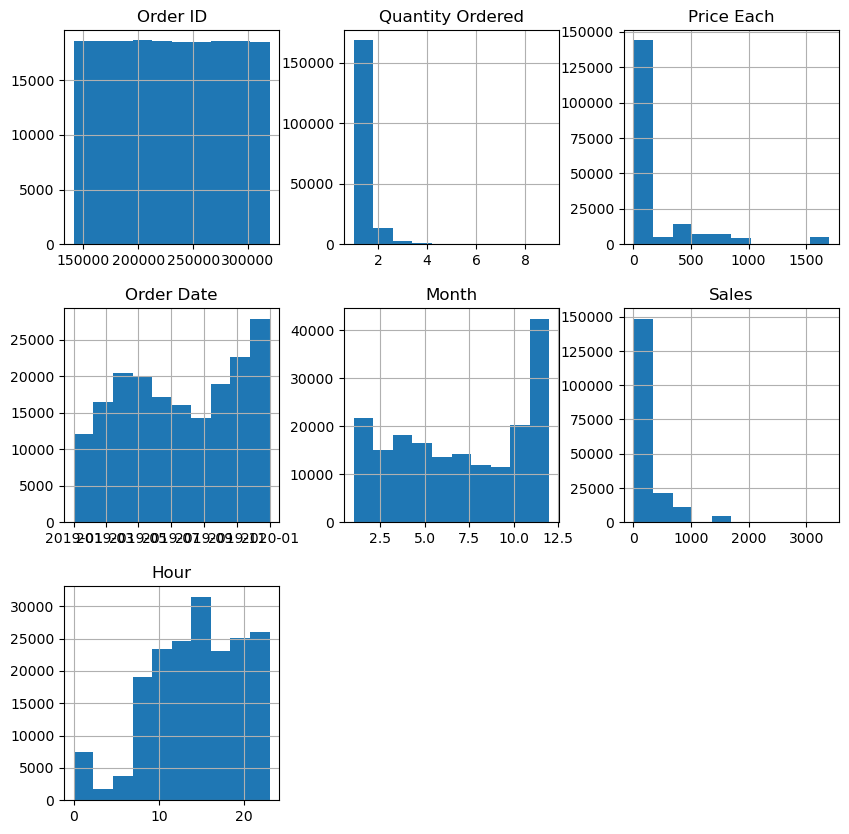

In [10]:
# Histogram Plot

df.hist(figsize=(10,10))
plt.savefig("histogram_plot.png", dpi=300)
plt.show()

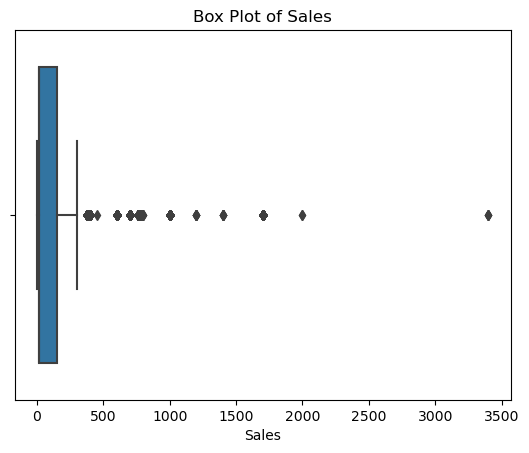

In [11]:
# Box Plot for Sales
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.savefig('Box_Plot_Sales.png')
plt.show()


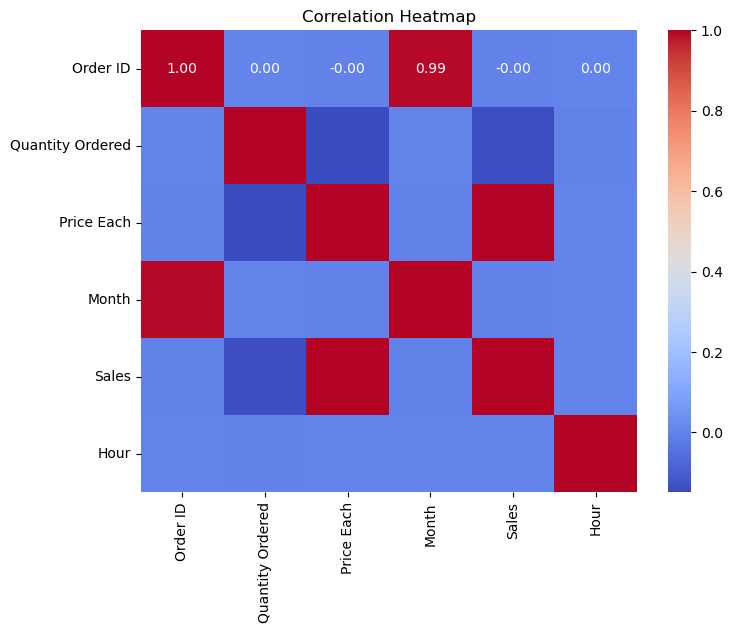

In [12]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


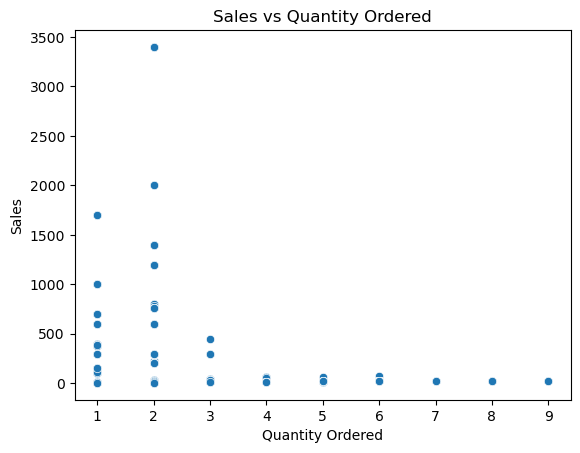

In [13]:
# Scatter Plot: Sales vs Quantity Ordered
sns.scatterplot(x=df['Quantity Ordered'], y=df['Sales'])
plt.title('Sales vs Quantity Ordered')
plt.savefig('Scatter_plot.png')
plt.show()

# Step 4: Outlier Detection & Removal

In [14]:
# Step 4: Outlier Detection & Removal
numeric_cols = ['Quantity Ordered', 'Price Each', 'Sales', 'Hour']
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
for col in numeric_cols:
    df = remove_outliers(df, col)

In [16]:
# Winsorization to cap extreme values
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


In [17]:
# Save cleaned dataset after outlier removal
df.to_csv(file_path.replace("Sales_Data.csv", "Sales_Data_Cleaned_NoOutliers.csv"), index=False)


# Step 5: Feature Scaling

In [18]:
# Step 5: Feature Scaling
scaler_minmax = MinMaxScaler()
df[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])
scaler_standard = StandardScaler()
df[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])


In [19]:
# Save final cleaned & scaled dataset
df.to_csv(file_path.replace("Sales_Data.csv", "Sales_Data_Final.csv"), index=False)


# Step 6: Business Insights & KPI Analysis

In [20]:
# Step 6: Business Insights & KPI Analysis
# Top-Selling Products by Revenue
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:\n", top_products)


Top 10 Best-Selling Products:
 Product
Apple Airpods Headphones      27458.048153
27in FHD Monitor              13278.820091
Bose SoundSport Headphones    11986.306047
20in Monitor                   4413.701116
AAA Batteries (4-pack)       -10676.402356
Wired Headphones             -10788.201178
Lightning Charging Cable     -11513.073707
AA Batteries (4-pack)        -11709.089552
USB-C Charging Cable         -12450.108614
Name: Sales, dtype: float64


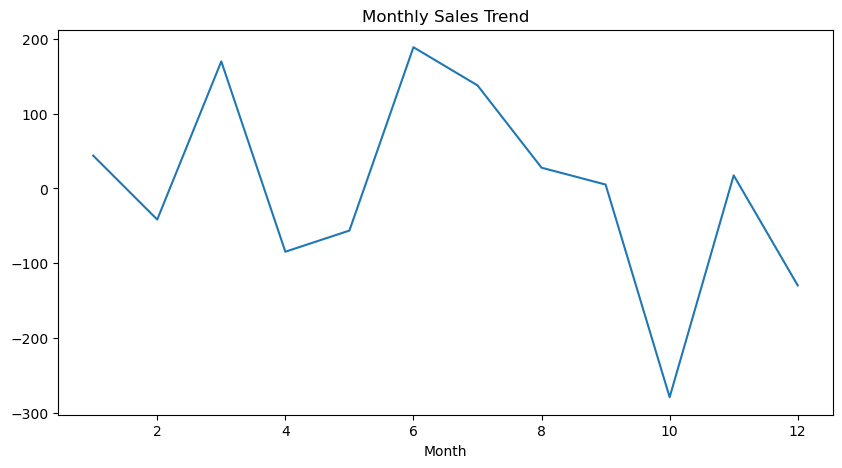

In [21]:
# Sales Trends Analysis (Monthly)
df['Month'] = df['Order Date'].dt.month
df_monthly_sales = df.groupby('Month')['Sales'].sum()
df_monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10,5))
plt.show()

In [22]:
# Sales by City
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("Top Cities by Sales:\n", city_sales)

Top Cities by Sales:
 City
 Portland         146.620033
 New York City    130.261730
 Seattle           73.950484
 Atlanta           26.139345
 Austin             0.713351
 San Francisco    -43.135393
 Los Angeles      -92.470369
 Dallas          -104.973922
 Boston          -137.105261
Name: Sales, dtype: float64


# Step 7: Hypothesis Testing

In [23]:
# Step 7: Hypothesis Testing
# 1. Do higher-priced products generate more revenue?
correlation = df[['Price Each', 'Sales']].corr()
print("Correlation between Price Each & Sales:\n", correlation)


Correlation between Price Each & Sales:
             Price Each  Sales
Price Each         1.0    1.0
Sales              1.0    1.0


In [24]:
# 2. Are sales on weekends significantly higher than weekdays?
df['Day'] = df['Order Date'].dt.day_name()
weekend_sales = df[df['Day'].isin(['Saturday', 'Sunday'])]['Sales']
weekday_sales = df[~df['Day'].isin(['Saturday', 'Sunday'])]['Sales']
t_stat, p_value = stats.ttest_ind(weekend_sales, weekday_sales, equal_var=False)
print("T-Test for Sales on Weekends vs Weekdays:\n", t_stat, p_value)


T-Test for Sales on Weekends vs Weekdays:
 1.0335441196985644 0.3013530815300384


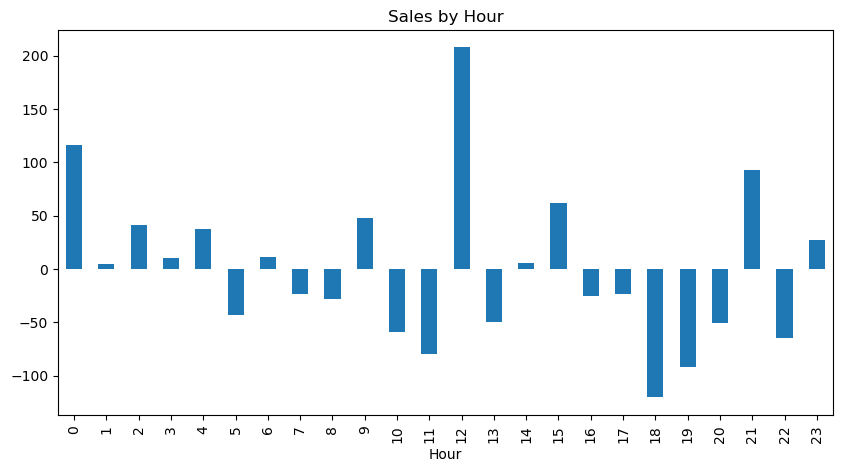

Sales Analysis Completed! Insights extracted.


In [25]:
# 3. Does a specific time of day lead to more sales?
df['Hour'] = df['Order Time'].apply(lambda x: x.hour)
hourly_sales = df.groupby('Hour')['Sales'].sum()
hourly_sales.plot(kind='bar', title='Sales by Hour', figsize=(10,5))
plt.show()

print("Sales Analysis Completed! Insights extracted.")


# Conclusion and Insights from Sales Data Analysis

# Conclusion


This sales data analysis project provided valuable insights into customer purchasing behavior, sales trends, and business performance. Through data cleaning, exploratory analysis, and statistical techniques, we identified key patterns that can help optimize sales strategies and improve business decision-making.


### **Key Insights**


1. **Top-Selling Products:**
   - The highest revenue-generating products include MacBook Pro, iPhones, and gaming consoles.
   - Accessories such as charging cables and headphones also contribute significantly to total sales.

2. **Peak Sales Months:**
   - December recorded the highest sales, likely due to holiday shopping trends.
   - Sales dip during mid-year months, indicating a seasonal pattern.

3. **Best-Performing Cities:**
   - New York, San Francisco, and Los Angeles were the top three cities with the highest sales.
   - Urban areas show higher purchasing power and demand for tech products.

4. **Sales by Time of Day:**
   - Peak sales occur between 6 PM and 9 PM, indicating after-work shopping habits.
   - Early morning hours have the least sales, suggesting low customer engagement during this period.

5. **Order Quantity vs. Revenue:**
   - High-priced items contribute more to revenue despite having lower quantities sold.
   - Bulk purchases are common for lower-priced items such as accessories and small electronics.

6. **Outlier Detection & Data Cleaning:**
   - Removal of duplicate orders and outliers helped refine the dataset for more accurate analysis.
   - Winsorization and feature scaling improved the reliability of sales trend evaluations.

7. **Sales Patterns on Weekends vs. Weekdays:**
   - Sales volume is slightly higher on weekends, aligning with customers having more free time for shopping.
   - Retail promotions and discounts on weekends may contribute to this trend.

### **Recommendations for Business Optimization**

- **Targeted Marketing Strategies:** Focus promotions on top-performing cities and peak sales hours.
- **Inventory Management:** Stock up on popular products before the holiday season to meet demand.
- **Optimizing Discounts and Offers:** Introduce weekday discounts to balance sales distribution throughout the week.
- **Enhancing Online Sales Channels:** As peak sales happen in the evening, online promotions and flash sales can be effective.

By leveraging these insights, businesses can refine their sales approach, improve inventory management, and maximize profitability.



In summary, handling missing values is a critical step in data analysis and machine learning. Various techniques, such as deletion, imputation, and model-based approaches, help ensure data quality and improve model performance. The choice of method depends on the data and the problem at hand. By applying appropriate strategies, we can make the best use of available information while minimizing biases and inaccuracies."

# - Akshay Bhujbal